# ROTATIONAL DIAGRAM
based in rotational diagram used in GONG et. al. 2024

- We use the linealization of Boltzmann ecuation, using: 

$\ln{\frac{N_u}{g_u} = ln{\frac{N_{tot}}{Q(T_{ex})}}} - \frac{E_u}{kT_{ex}}$

where:
- $N_u$: column at the top level
- $N_{tot}$: total column
- $g_u$: statistical degeneration of the level
- $Q(T_{rot})$: Partition function
- $E_u$: Upper level energy

Equation obtained from Tools of radio astronomy and complemented with eq. 18 in Andres E. Guzman et. al.  2014
For obtain $N_u$, we calculate: 

$N_u = \frac{8\pi k\nu^2}{hc^3 A_{ul}} \int{T_{mb}dv}$

with: 
- $\nu$: transition frequency
- $A_{ul}$: Einstein coefficient
- $\int{T_{mb}dv}$: Integrated intensity   -> In Gong, this  value is corrected by Beam dilution factor $\nu = \frac{\theta^2 _s}{\theta^2 _s + \theta^2 _b}$, where $\theta_s$, is the size of source and $\theta_b$ is the telescope beam.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const


In [109]:
# ====================== CONSTANTES EN CGS ======================
k_b = const.k_B.cgs.value      # erg/K
h = const.h.cgs.value          # erg s
c = const.c.cgs.value          # cm/s  

print(f"Constantes cgs: k_b = {k_b:.2e}, h = {h:.2e}, c = {c:.2e}")

# ====================== DATOS DE LÍNEAS ======================
# obtained from LAMBDA database
line_data = {
    'CF+(1-0)': {'frequency': 102.5875 * u.GHz, 'A_ul': 4.8167e-6 * u.s**-1 , 'g_u': 3 , 'E_u': 4.923 * u.K},
    'CF+(2-1)': {'frequency': 205.1705 * u.GHz, 'A_ul': 4.6237e-5 * u.s**-1, 'g_u': 5, 'E_u': 14.770 * u.K},
    'CF+(3-2)': {'frequency': 307.7443 * u.GHz, 'A_ul': 1.6716e-4 * u.s**-1, 'g_u': 7, 'E_u': 29.539 * u.K}
}

# ====================== CORRECCIÓN POR BEAM ======================
theta_s = 22.0   # Tamaño fuente (media geométrica, ya no se usa np.sqrt(22.0*4.4)) aproximation value 
#theta_s = 23.5 # source size obtained from GONG
theta_b_alma = 14   # Tamaño beam ALMA (1-0)
theta_b_apex1 = 29  # Tamaño beam APEX (2-1)
theta_b_apex2 = 19  # Tamaño beam APEX (3-2)

correct0 =  (theta_s**2) / ((theta_s**2) + (theta_b_alma**2))
correct1 =  (theta_s**2) / (theta_s**2 + theta_b_apex1**2)
correct2 =  (theta_s**2) / (theta_s**2 + theta_b_apex2**2)

print(f'Source size: {theta_s * u.arcsec:.2f}')
print(f'Correction factors: {correct0:.3f}, {correct1:.3f}, {correct2:.3f}')

# =================== Intensities ===================
#----------- ALMA VALUES ----------------
#int_10_raw19 = 0.10664333601407937 # ALMA 19"
#int_10_raw29 = 0.050988916316717516 # ALMA 29"
int_10_raw, ERR10_raw = 0.1601, 0.008 # ALMA 14" ,  error correspond to  rms*dv*sqrt(Nchan) in this position

#----------- APEX VALUES ----------------
int_21_raw, ERR21_raw = 0.0769, 0.0187 # errors correspond to rms residual line
int_32_raw, ERR32_raw = 0.0401, 0.0219 


# ............... GONG VALUES ...................
#int_21_raw = 40.2 * u.mK * u.km / u.s
#int_32_raw = 46.6 * u.mK * u.km / u.s

#int_21_raw = int_21_raw.to(u.K*u.km/u.s)
#int_32_raw = int_32_raw.to(u.K*u.km/u.s)
print(f"Integ. Intens. (2-1): {int_21_raw}")
print(f"Integ. Intens. (3-2): {int_32_raw}")


print("----------------------")
# Intensidades en K cm/s con corrección por beam
int_10 =  (int_10_raw / correct0) * u.K * u.km / u.s
int_21 = (int_21_raw/ correct1) * u.K * u.km / u.s
int_32 = (int_32_raw / correct2) * u.K * u.km / u.s

ERR10 = (ERR10_raw / correct0) * u.K * u.km / u.s
ERR21 = (ERR21_raw / correct1) * u.K * u.km / u.s
ERR32 = (ERR32_raw / correct2) * u.K * u.km / u.s

print(f"Integ. Intens. (corrected, theta_s={theta_s}): {int_10}")
print(f"Integ. Intens. (corrected, theta_s={theta_s}): {int_21}")
print(f"Integ. Intens. (corrected, theta_s={theta_s}): {int_32}")


print("-------------- Using other value of theta_s = 15 --------------")
# -------------- Using other value of theta_s --------------
theta_s_2 = 15.0  # arcsec
correct0_2 =  (theta_s_2**2) / (theta_s_2**2 + theta_b_alma**2)
correct1_2 =  (theta_s_2**2) / (theta_s_2**2 + theta_b_apex1**2)
correct2_2 =  (theta_s_2**2) / (theta_s_2**2 + theta_b_apex2**2)

print(f'Source size: {theta_s_2 * u.arcsec:.2f}')
print(f'Correction factors: {correct0_2:.3f}, {correct1_2:.3f}, {correct2_2:.3f}')

int_10_2 = (int_10_raw / correct0_2) * u.K * u.km / u.s 
int_21_2 = (int_21_raw / correct1_2) * u.K * u.km / u.s
int_32_2 = (int_32_raw / correct2_2) * u.K * u.km / u.s

ERR10_2 = (ERR10_raw / correct0_2) * u.K * u.km / u.s
ERR21_2 = (ERR21_raw / correct1_2) * u.K * u.km / u.s
ERR32_2 = (ERR32_raw / correct2_2) * u.K * u.km / u.s

print(f"Integ. Intens. (theta_s={theta_s_2}''): {int_10_2}")
print(f"Integ. Intens. (theta_s={theta_s_2}''): {int_21_2}")
print(f"Integ. Intens. (theta_s={theta_s_2}''): {int_32_2}")

print("-------------- Using other value of theta_s = 10 --------------")
# -------------- Using other value of theta_s --------------
theta_s_3 = 10.0  # arcsec
correct0_3 =  (theta_s_3**2) / (theta_s_3**2 + theta_b_alma**2)
correct1_3 =  (theta_s_3**2) / (theta_s_3**2 + theta_b_apex1**2)
correct2_3 =  (theta_s_3**2) / (theta_s_3**2 + theta_b_apex2**2)

print(f'Source size: {theta_s_3 * u.arcsec:.2f}')
print(f'Correction factors: {correct0_3:.3f}, {correct1_3:.3f}, {correct2_3:.3f}')

int_10_3 = (int_10_raw / correct0_3) * u.K * u.km / u.s 
int_21_3 = (int_21_raw / correct1_3) * u.K * u.km / u.s
int_32_3 = (int_32_raw / correct2_3) * u.K * u.km / u.s

ERR10_3 = (ERR10_raw / correct0_3) * u.K * u.km / u.s
ERR21_3 = (ERR21_raw / correct1_3) * u.K * u.km / u.s
ERR32_3 = (ERR32_raw / correct2_3) * u.K * u.km / u.s

print(f"Integ. Intens. (theta_s={theta_s_3}''): {int_10_3}")
print(f"Integ. Intens. (theta_s={theta_s_3}''): {int_21_3}")
print(f"Integ. Intens. (theta_s={theta_s_3}''): {int_32_3}")


Constantes cgs: k_b = 1.38e-16, h = 6.63e-27, c = 3.00e+10
Source size: 22.00 arcsec
Correction factors: 0.712, 0.365, 0.573
Integ. Intens. (2-1): 0.0769
Integ. Intens. (3-2): 0.0401
----------------------
Integ. Intens. (corrected, theta_s=22.0): 0.22493388429752065 K km / s
Integ. Intens. (corrected, theta_s=22.0): 0.21052169421487602 K km / s
Integ. Intens. (corrected, theta_s=22.0): 0.07000929752066115 K km / s
-------------- Using other value of theta_s = 15 --------------
Source size: 15.00 arcsec
Correction factors: 0.534, 0.211, 0.384
Integ. Intens. (theta_s=15.0''): 0.2995648888888889 K km / s
Integ. Intens. (theta_s=15.0''): 0.36433511111111105 K km / s
Integ. Intens. (theta_s=15.0''): 0.10443822222222221 K km / s
-------------- Using other value of theta_s = 10 --------------
Source size: 10.00 arcsec
Correction factors: 0.338, 0.106, 0.217
Integ. Intens. (theta_s=10.0''): 0.473896 K km / s
Integ. Intens. (theta_s=10.0''): 0.723629 K km / s
Integ. Intens. (theta_s=10.0''): 0

In [135]:
# ====================== LISTAS ======================
# ----------- USING THETA_S = 22 -----------
lines = ['CF+(1-0)', 'CF+(2-1)', 'CF+(3-2)']
int_list = [int_10, int_21, int_32]
err_int_list = [ERR10, ERR21, ERR32]
E_u_list = [line_data[l]['E_u'].value for l in lines]

log_Nu_gu_list = []
err_log_Nu_gu_list = []

# ====================== CÁLCULO DE N_u ======================
for i, l in enumerate(lines):
    nu = line_data[l]['frequency'].to(u.Hz).value
    A_ul = line_data[l]['A_ul'].value
    g_u = line_data[l]['g_u']
    int_T_kms = int_list[i].value
    err_int_kms = err_int_list[i].value

    # K·km/s → K·cm/s
    int_T_cms = int_T_kms * 1e5
    err_int_T_cms = err_int_kms * 1e5

    factor = (8 * np.pi * k_b * nu**2) / (h * c**3 * A_ul)  

    # N_u en cm -2
    N_u = factor * int_T_cms
    N_u_per_gu = N_u / g_u

    err_N_u = factor * err_int_T_cms
    err_N_u_per_gu = err_N_u / g_u


    # Ahora sí: log10 de un número puro
    log_Nu_gu = np.log10(N_u_per_gu)
    log_Nu_gu_list.append(log_Nu_gu)

    err_log_Nu_gu = (1 / (N_u_per_gu * np.log(10))) * err_N_u_per_gu
    err_log_Nu_gu_list.append(err_log_Nu_gu)

    print(f"\n{l}:")
    print(f"  freq = {nu:.3e} Hz")
    print(f"  A_ul = {A_ul:.3e} s-1")
    print(f"  integ. (corrected) in sgs unit = {int_T_kms:.3f} K·km/s → {int_T_cms:.3e} K·cm/s")
    print(f"  factor = {factor:.3e} cm-2/(K·cm/s)")
    print(f"  N_u = {N_u:.3e} ± {err_N_u:.3e} cm⁻²")
    print(f"  N_u / g_u = {N_u_per_gu:.3e} ± {err_N_u_per_gu:.3e} cm⁻²")
    print(f"  log10(N_u/g_u) = {log_Nu_gu:.3f} ± {err_log_Nu_gu:.3f}")

# ====================== AJUSTE LINEAL ======================
from scipy.stats import linregress
from scipy.optimize import curve_fit

# Fit simple (sin ponderar) con linregress
result = linregress(E_u_list, log_Nu_gu_list)
slope = result.slope
intercept = result.intercept
err_slope = result.stderr
err_intercept = result.intercept_stderr  # Corregido: es intercept_stderr

T_rot = -1.0 / (slope * np.log(10))
err_T_rot = abs(T_rot) * (err_slope / abs(slope))  # Propagación aproximada


# Fit ponderado con curve_fit
def linear(x, m, b):
    return m * x + b

# Ahora todo es array de números puros → curve_fit feliz
popt, pcov = curve_fit(linear, E_u_list, log_Nu_gu_list,
                       sigma=err_log_Nu_gu, absolute_sigma=True)
slope_w = popt[0]
intercept_w = popt[1]
err_slope_w = np.sqrt(pcov[0,0])
err_intercept_w = np.sqrt(pcov[1,1])

T_rot_w = -1.0 / (slope_w * np.log(10))
err_T_rot_w = abs(T_rot_w) * (err_slope_w / abs(slope_w))

print(f"\n=== RESULTADO FINAL (ponderado por errores) ===")
print(f"slope = {slope_w:.4e} +/- {err_slope_w:.4e}")
print(f"intercept = {intercept_w:.3f} +/- {err_intercept_w:.3f}")
print(f"T_rot = {T_rot_w:.1f} +/- {err_T_rot_w:.1f} K")

# ====================== FUNCIÓN DE PARTICIÓN ======================
def partition_function(T_rot, B_hz=5.129375e10):
    theta_rot = (h * B_hz) / k_b
    Q = 0.0
    for J in range(200):
        g_j = 2*J + 1
        E_j = J*(J+1)*theta_rot
        Q += g_j * np.exp(-E_j / T_rot)
    return Q

# Para ponderado (mejor)
Q_w = partition_function(T_rot_w)
Q_plus_w = partition_function(T_rot_w + err_T_rot_w)
Q_minus_w = partition_function(T_rot_w - err_T_rot_w)
err_Q_w = (Q_plus_w - Q_minus_w) / 2  # Aprox. error

N_tot_w = 10**intercept_w * Q_w
err_ln_N_tot_w = np.sqrt( (np.log(10) * err_intercept_w)**2 + (err_Q_w / Q_w)**2 )
err_N_tot_w = N_tot_w * err_ln_N_tot_w

print(f"Q(T_rot) = {Q_w:.2f} +/- {err_Q_w:.2f}")
print(f"N_tot = {N_tot_w:.3e} +/- {err_N_tot_w:.3e} cm⁻²")


CF+(1-0):
  freq = 1.026e+11 Hz
  A_ul = 4.817e-06 s-1
  integ. (corrected) in sgs unit = 0.225 K·km/s → 2.249e+04 K·cm/s
  factor = 4.247e+07 cm-2/(K·cm/s)
  N_u = 9.552e+11 ± 4.773e+10 cm⁻²
  N_u / g_u = 3.184e+11 ± 1.591e+10 cm⁻²
  log10(N_u/g_u) = 11.503 ± 0.022

CF+(2-1):
  freq = 2.052e+11 Hz
  A_ul = 4.624e-05 s-1
  integ. (corrected) in sgs unit = 0.211 K·km/s → 2.105e+04 K·cm/s
  factor = 1.769e+07 cm-2/(K·cm/s)
  N_u = 3.725e+11 ± 9.059e+10 cm⁻²
  N_u / g_u = 7.450e+10 ± 1.812e+10 cm⁻²
  log10(N_u/g_u) = 10.872 ± 0.106

CF+(3-2):
  freq = 3.077e+11 Hz
  A_ul = 1.672e-04 s-1
  integ. (corrected) in sgs unit = 0.070 K·km/s → 7.001e+03 K·cm/s
  factor = 1.101e+07 cm-2/(K·cm/s)
  N_u = 7.709e+10 ± 4.210e+10 cm⁻²
  N_u / g_u = 1.101e+10 ± 6.015e+09 cm⁻²
  log10(N_u/g_u) = 10.042 ± 0.237

=== RESULTADO FINAL (ponderado por errores) ===
slope = -5.9107e-02 +/- 1.3537e-02
intercept = 11.776 +/- 0.261
T_rot = 7.3 +/- 1.7 K
Q(T_rot) = 3.34 +/- 0.68
N_tot = 1.994e+12 +/- 1.264e+12 cm⁻²

In [136]:
# ====================== LISTAS ======================
# ----------- USING THETA_S = 15 -----------
lines2 = ['CF+(1-0)', 'CF+(2-1)', 'CF+(3-2)']
int_list2 = [int_10_2, int_21_2, int_32_2]
err_int_list2 = [ERR10_2, ERR21_2, ERR32_2]
E_u_list_2 = [line_data[l]['E_u'].value for l in lines2]

log_Nu_gu_list_2 = []
err_log_Nu_gu_list2 = []
# ====================== CÁLCULO DE N_u ======================
for i, l in enumerate(lines2):
    nu = line_data[l]['frequency'].to(u.Hz).value
    A_ul = line_data[l]['A_ul'].value
    g_u = line_data[l]['g_u']
    int_T_kms2 = int_list2[i].value
    err_int_kms2 = err_int_list2[i].value
    # K·km/s → K·cm/s
    int_T_cms2 = int_T_kms2 * 1e5
    err_int_T_cms2 = err_int_kms2 * 1e5

    factor2 = (8 * np.pi * k_b * nu**2) / (h * c**3 * A_ul)  

    # N_u en cm⁻²
    N_u2 = factor2 * int_T_cms2
    N_u_per_gu2 = N_u2 / g_u

    err_N_u2 = factor2 * err_int_T_cms2
    err_N_u_per_gu2 = err_N_u2 / g_u

    # Ahora sí: log10 de un número puro
    log_Nu_gu2 = np.log10(N_u_per_gu2)
    log_Nu_gu_list_2.append(log_Nu_gu2)

    err_log_Nu_gu2 = (1 / (N_u_per_gu2 * np.log(10))) * err_N_u_per_gu2
    err_log_Nu_gu_list2.append(err_log_Nu_gu2)

    print(f"\n{l}:")
    print(f"  freq = {nu:.3e} Hz")
    print(f"  A_ul = {A_ul:.3e} s-1")
    print(f"  Integ = {int_T_kms2:.3f} K·km/s → {int_T_cms2:.3e} K·cm/s")
    print(f"  factor = {factor2:.3e} cm-2/(K·cm/s)")
    print(f"  N_u = {N_u2:.3e} ± {err_N_u2:.3e} cm⁻²")
    print(f"  N_u / g_u = {N_u_per_gu2:.3e} ± {err_N_u_per_gu2:.3e} cm⁻²")
    print(f"  log₁₀(N_u/g_u) = {log_Nu_gu2:.3f} ± {err_log_Nu_gu2:.3f}")

# ====================== AJUSTE LINEAL ======================
# Fit ponderado con curve_fit
def linear(x, m, b):
    return m * x + b

# Ahora todo es array de números puros → curve_fit feliz
popt2, pcov2 = curve_fit(linear, E_u_list_2, log_Nu_gu_list_2,
                       sigma=err_log_Nu_gu2, absolute_sigma=True)
slope_w2 = popt2[0]
intercept_w2 = popt2[1]
err_slope_w2 = np.sqrt(pcov2[0,0])
err_intercept_w2 = np.sqrt(pcov2[1,1])

T_rot_w2 = -1.0 / (slope_w2 * np.log(10))
err_T_rot_w2 = abs(T_rot_w2) * (err_slope_w2 / abs(slope_w2))

print(f"\n=== RESULTADO FINAL (ponderado por errores) ===")
print(f"slope = {slope_w2:.4e} +/- {err_slope_w2:.4e}")
print(f"intercept = {intercept_w2:.3f} +/- {err_intercept_w2:.3f}")
print(f"T_rot = {T_rot_w2:.1f} +/- {err_T_rot_w2:.1f} K")

# ====================== FUNCIÓN DE PARTICIÓN ======================
def partition_function(T_rot2, B_hz=5.129375e10):
    theta_rot2 = (h * B_hz) / k_b
    Q2 = 0.0
    for J in range(200):
        g_j = 2*J + 1
        E_j2 = J*(J+1)*theta_rot2
        Q2 += g_j * np.exp(-E_j2 / T_rot2)
    return Q2

# Para ponderado (mejor)
Q_w2 = partition_function(T_rot_w2)
Q_plus_w2 = partition_function(T_rot_w2 + err_T_rot_w2)
Q_minus_w2 = partition_function(T_rot_w2 - err_T_rot_w2)
err_Q_w2 = (Q_plus_w2 - Q_minus_w2) / 2  # Aprox. error

N_tot_w2 = 10**intercept_w2 * Q_w2
err_ln_N_tot_w2 = np.sqrt( (np.log(10) * err_intercept_w2)**2 + (err_Q_w2 / Q_w2)**2 )
err_N_tot_w2 = N_tot_w2 * err_ln_N_tot_w2

print(f"Q(T_rot) = {Q_w2:.2f} +/- {err_Q_w2:.2f}")
print(f"N_tot = {N_tot_w2:.3e} +/- {err_N_tot_w2:.3e} cm⁻²")


CF+(1-0):
  freq = 1.026e+11 Hz
  A_ul = 4.817e-06 s-1
  Integ = 0.300 K·km/s → 2.996e+04 K·cm/s
  factor = 4.247e+07 cm-2/(K·cm/s)
  N_u = 1.272e+12 ± 6.357e+10 cm⁻²
  N_u / g_u = 4.240e+11 ± 2.119e+10 cm⁻²
  log₁₀(N_u/g_u) = 11.627 ± 0.022

CF+(2-1):
  freq = 2.052e+11 Hz
  A_ul = 4.624e-05 s-1
  Integ = 0.364 K·km/s → 3.643e+04 K·cm/s
  factor = 1.769e+07 cm-2/(K·cm/s)
  N_u = 6.447e+11 ± 1.568e+11 cm⁻²
  N_u / g_u = 1.289e+11 ± 3.135e+10 cm⁻²
  log₁₀(N_u/g_u) = 11.110 ± 0.106

CF+(3-2):
  freq = 3.077e+11 Hz
  A_ul = 1.672e-04 s-1
  Integ = 0.104 K·km/s → 1.044e+04 K·cm/s
  factor = 1.101e+07 cm-2/(K·cm/s)
  N_u = 1.150e+11 ± 6.281e+10 cm⁻²
  N_u / g_u = 1.643e+10 ± 8.973e+09 cm⁻²
  log₁₀(N_u/g_u) = 10.216 ± 0.237

=== RESULTADO FINAL (ponderado por errores) ===
slope = -5.7608e-02 +/- 1.3537e-02
intercept = 11.930 +/- 0.261
T_rot = 7.5 +/- 1.8 K
Q(T_rot) = 3.42 +/- 0.71
N_tot = 2.909e+12 +/- 1.850e+12 cm⁻²


In [137]:
# ====================== LISTAS ======================
# ----------- USING THETA_S = 22 -----------
lines3 = ['CF+(1-0)', 'CF+(2-1)', 'CF+(3-2)']
int_list3 = [int_10_3, int_21_3, int_32_3]
err_int_list3 = [ERR10_3, ERR21_3, ERR32_3]
E_u_list_3 = [line_data[l]['E_u'].value for l in lines3]

log_Nu_gu_list_3 = []
err_log_Nu_gu_list3 = []
# ====================== CÁLCULO DE N_u ======================
for i, l in enumerate(lines3):
    nu = line_data[l]['frequency'].to(u.Hz).value
    A_ul = line_data[l]['A_ul'].value
    g_u = line_data[l]['g_u']
    int_T_kms3 = int_list3[i].value
    err_int_kms3 = err_int_list3[i].value
    # K·km/s → K·cm/s
    int_T_cms3 = int_T_kms3 * 1e5
    err_int_T_cms3 = err_int_kms3 * 1e5

    factor3 = (8 * np.pi * k_b * nu**2) / (h * c**3 * A_ul)  

    # N_u en cm⁻²
    N_u3 = factor3 * int_T_cms3
    N_u_per_gu3 = N_u3 / g_u

    err_N_u3 = factor3 * err_int_T_cms3
    err_N_u_per_gu3 = err_N_u3 / g_u

    # Ahora sí: log10 de un número puro
    log_Nu_gu3 = np.log10(N_u_per_gu3)
    log_Nu_gu_list_3.append(log_Nu_gu3)

    err_log_Nu_gu3 = (1 / (N_u_per_gu3 * np.log(10))) * err_N_u_per_gu3
    err_log_Nu_gu_list3.append(err_log_Nu_gu3)

    print(f"\n{l}:")
    print(f"  freq = {nu:.3e} Hz")
    print(f"  A_ul = {A_ul:.3e} s-1")
    print(f"  Integ = {int_T_kms3:.3f} K·km/s → {int_T_cms3:.3e} K·cm/s")
    print(f"  factor = {factor3:.3e} cm-2/(K·cm/s)")
    print(f"  N_u = {N_u3:.3e} ± {err_N_u3:.3e} cm⁻²")
    print(f"  N_u / g_u = {N_u_per_gu3:.3e} ± {err_N_u_per_gu3:.3e} cm⁻²")
    print(f"  log₁₀(N_u/g_u) = {log_Nu_gu3:.3f} ± {err_log_Nu_gu3:.3f}")

# ====================== AJUSTE LINEAL ======================
# Fit ponderado con curve_fit
def linear(x, m, b):
    return m * x + b

# Ahora todo es array de números puros → curve_fit feliz
popt3, pcov3 = curve_fit(linear, E_u_list_3, log_Nu_gu_list_3,
                       sigma=err_log_Nu_gu3, absolute_sigma=True)
slope_w3 = popt3[0]
intercept_w3 = popt3[1]
err_slope_w3 = np.sqrt(pcov3[0,0])
err_intercept_w3 = np.sqrt(pcov3[1,1])

T_rot_w3 = -1.0 / (slope_w3 * np.log(10))
err_T_rot_w3 = abs(T_rot_w3) * (err_slope_w3 / abs(slope_w3))

print(f"\n=== RESULTADO FINAL (ponderado por errores) ===")
print(f"slope = {slope_w3:.4e} +/- {err_slope_w3:.4e}")
print(f"intercept = {intercept_w3:.3f} +/- {err_intercept_w3:.3f}")
print(f"T_rot = {T_rot_w3:.1f} +/- {err_T_rot_w3:.1f} K")

# ====================== FUNCIÓN DE PARTICIÓN ======================
def partition_function(T_rot3, B_hz=5.129375e10):
    theta_rot3 = (h * B_hz) / k_b
    Q3 = 0.0
    for J in range(200):
        g_j = 2*J + 1
        E_j3 = J*(J+1)*theta_rot3
        Q3 += g_j * np.exp(-E_j3 / T_rot3)
    return Q3

# Para ponderado (mejor)
Q_w3 = partition_function(T_rot_w3)
Q_plus_w3 = partition_function(T_rot_w3 + err_T_rot_w3)
Q_minus_w3 = partition_function(T_rot_w3 - err_T_rot_w3)
err_Q_w3 = (Q_plus_w3 - Q_minus_w3) / 2  # Aprox. error

N_tot_w3 = 10**intercept_w3 * Q_w3
err_ln_N_tot_w3 = np.sqrt( (np.log(10) * err_intercept_w3)**2 + (err_Q_w3 / Q_w3)**2 )
err_N_tot_w3 = N_tot_w3 * err_ln_N_tot_w3

print(f"Q(T_rot) = {Q_w3:.2f} +/- {err_Q_w3:.2f}")
print(f"N_tot = {N_tot_w3:.3e} +/- {err_N_tot_w3:.3e} cm⁻²")


CF+(1-0):
  freq = 1.026e+11 Hz
  A_ul = 4.817e-06 s-1
  Integ = 0.474 K·km/s → 4.739e+04 K·cm/s
  factor = 4.247e+07 cm-2/(K·cm/s)
  N_u = 2.012e+12 ± 1.006e+11 cm⁻²
  N_u / g_u = 6.708e+11 ± 3.352e+10 cm⁻²
  log₁₀(N_u/g_u) = 11.827 ± 0.022

CF+(2-1):
  freq = 2.052e+11 Hz
  A_ul = 4.624e-05 s-1
  Integ = 0.724 K·km/s → 7.236e+04 K·cm/s
  factor = 1.769e+07 cm-2/(K·cm/s)
  N_u = 1.280e+12 ± 3.114e+11 cm⁻²
  N_u / g_u = 2.561e+11 ± 6.227e+10 cm⁻²
  log₁₀(N_u/g_u) = 11.408 ± 0.106

CF+(3-2):
  freq = 3.077e+11 Hz
  A_ul = 1.672e-04 s-1
  Integ = 0.185 K·km/s → 1.849e+04 K·cm/s
  factor = 1.101e+07 cm-2/(K·cm/s)
  N_u = 2.036e+11 ± 1.112e+11 cm⁻²
  N_u / g_u = 2.908e+10 ± 1.588e+10 cm⁻²
  log₁₀(N_u/g_u) = 10.464 ± 0.237

=== RESULTADO FINAL (ponderado por errores) ===
slope = -5.6050e-02 +/- 1.3537e-02
intercept = 12.153 +/- 0.261
T_rot = 7.7 +/- 1.9 K
Q(T_rot) = 3.50 +/- 0.75
N_tot = 4.979e+12 +/- 3.178e+12 cm⁻²


<>:107: SyntaxWarning: invalid escape sequence '\l'
<>:107: SyntaxWarning: invalid escape sequence '\l'
C:\Users\macka\AppData\Local\Temp\ipykernel_16528\2521217435.py:107: SyntaxWarning: invalid escape sequence '\l'
  ax.set_ylabel('$\log_{10} (N_u / g_u)$ [cm$^{-2}$]', fontsize=14)


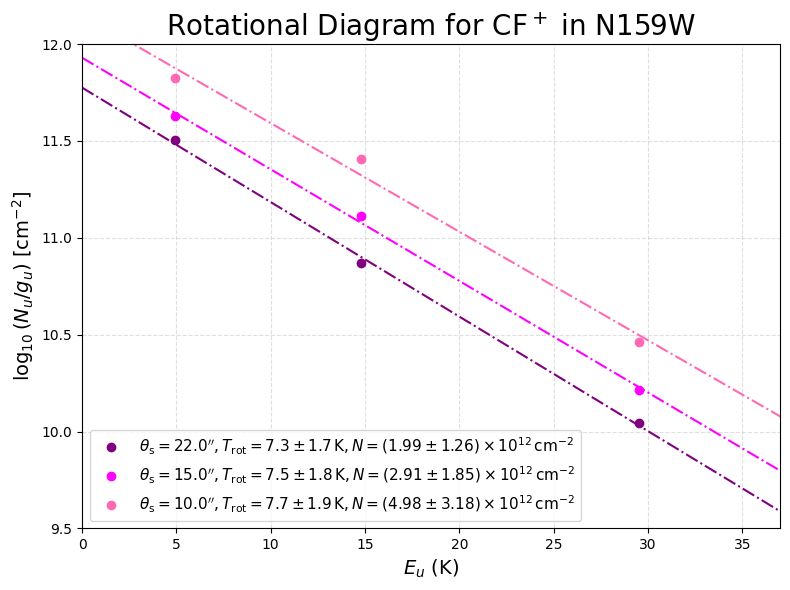

In [138]:
# ===================== DIAGRAMA ROTACIONAL =====================
def sci_with_error(val, err):
    """
    Devuelve mantisa_val, mantisa_err, exponente
    tal que val = mantisa_val * 10**exp
         err = mantisa_err * 10**exp
    """
    exp = int(np.floor(np.log10(val)))
    scale = 10.0**exp
    mant_val = val / scale
    mant_err = err / scale
    return mant_val, mant_err, exp

# --- N y errores, caso 1 ---
N1_mant, N1_err_mant, N1_exp = sci_with_error(N_tot_w, err_N_tot_w)

# --- N y errores, caso 2 ---
N2_mant, N2_err_mant, N2_exp = sci_with_error(N_tot_w2, err_N_tot_w2)

# --- N y errores, caso 3 ---
N3_mant, N3_err_mant, N3_exp = sci_with_error(N_tot_w3, err_N_tot_w3)

fig, ax = plt.subplots(figsize=(8, 6))

# --- Convertir listas a arrays NUMÉRICOS (quitando units si las hay) ---
E_u_arr       = np.array([getattr(v, "value", v) for v in E_u_list], dtype=float)
logNu_arr     = np.array([getattr(v, "value", v) for v in log_Nu_gu_list], dtype=float)
err_logNu_arr = np.array([getattr(e, "value", e) for e in err_log_Nu_gu_list], dtype=float)

E_u_arr2        = np.array([getattr(v, "value", v) for v in E_u_list_2], dtype=float)
logNu_arr2      = np.array([getattr(v, "value", v) for v in log_Nu_gu_list_2], dtype=float)
err_logNu_arr2  = np.array([getattr(e, "value", e) for e in err_log_Nu_gu_list2], dtype=float)

E_u_arr3        = np.array([getattr(v, "value", v) for v in E_u_list_3], dtype=float)
logNu_arr3      = np.array([getattr(v, "value", v) for v in log_Nu_gu_list_3], dtype=float)
err_logNu_arr3  = np.array([getattr(e, "value", e) for e in err_log_Nu_gu_list3], dtype=float)


# === Etiquetas de leyenda con θ_s, T_rot y N_tot ===
label1 = (
    rf'$\theta_{{\mathrm{{s}}}} = {theta_s:.1f}^{{\prime\prime}}, '
    rf'T_{{\mathrm{{rot}}}} = {T_rot_w:.1f} \pm {err_T_rot_w:.1f}\,\mathrm{{K}}, '
    rf'N = ({N1_mant:.2f} \pm {N1_err_mant:.2f})\times 10^{{{N1_exp}}}\,\mathrm{{cm}}^{{-2}}$'
)

label2 = (
    rf'$\theta_{{\mathrm{{s}}}} = {theta_s_2:.1f}^{{\prime\prime}}, '
    rf'T_{{\mathrm{{rot}}}} = {T_rot_w2:.1f} \pm {err_T_rot_w2:.1f}\,\mathrm{{K}}, '
    rf'N = ({N2_mant:.2f} \pm {N2_err_mant:.2f})\times 10^{{{N2_exp}}}\,\mathrm{{cm}}^{{-2}}$'
)

label3 = (
    rf'$\theta_{{\mathrm{{s}}}} = {theta_s_3:.1f}^{{\prime\prime}}, '
    rf'T_{{\mathrm{{rot}}}} = {T_rot_w3:.1f} \pm {err_T_rot_w3:.1f}\,\mathrm{{K}}, '
    rf'N = ({N3_mant:.2f} \pm {N3_err_mant:.2f})\times 10^{{{N3_exp}}}\,\mathrm{{cm}}^{{-2}}$'
)


ax.plot(E_u_arr, logNu_arr, 'o', label=label1, color='purple')
ax.plot(E_u_arr2, logNu_arr2, 'o', label=label2, color='magenta')
ax.plot(E_u_arr3, logNu_arr3, 'o', label=label3, color='hotpink')

# ===================== CASO 1: θ_s =====================
#ax.errorbar(
#    E_u_arr,
#    logNu_arr,
#    yerr=err_logNu_arr,
#    fmt='o',
#    capsize=4,
#    label=label1,
#    color='orange')

x_fit = np.linspace(0, E_u_arr.max()+30, 100)
y_fit = slope_w * x_fit + intercept_w   # ajuste ponderado
ax.plot(x_fit, y_fit, '-.', color='purple')

# ===================== CASO 2: θ_s = 15" =====================
#ax.errorbar(
#    E_u_arr2,
#    logNu_arr2,
#    yerr=err_logNu_arr2,
#    fmt='s',
#    capsize=4,
#    label=label2,
#    color='green')

x_fit2 = np.linspace(0, E_u_arr2.max()+30, 100)
y_fit2 = slope_w2 * x_fit2 + intercept_w2
ax.plot(x_fit2, y_fit2, '-.', color='magenta')

# ===================== CASO 2: θ_s = 22" =====================
#ax.errorbar(
#    E_u_arr3,
#    logNu_arr3,
#    yerr=err_logNu_arr3,
#    fmt='s',
#    capsize=4,
#    label=label3,
#    color='red')

x_fit3 = np.linspace(0, E_u_arr3.max()+30, 100)
y_fit3 = slope_w3 * x_fit3 + intercept_w3
ax.plot(x_fit3, y_fit3, '-.', color='hotpink')

# ===================== ESTÉTICA =====================
ax.set_xlabel('$E_u$ (K)', fontsize=14)
ax.set_ylabel('$\log_{10} (N_u / g_u)$ [cm$^{-2}$]', fontsize=14)
ax.set_title('Rotational Diagram for CF$^+$ in N159W', fontsize=20)
ax.legend(fontsize=11)
ax.grid(True, ls='--', alpha=0.4)
ax.set_xlim(0,37)
ax.set_ylim(9.5, 12.0)

plt.tight_layout()
plt.show()


<>:6: SyntaxWarning: invalid escape sequence '\T'
<>:11: SyntaxWarning: invalid escape sequence '\T'
<>:15: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\T'
<>:11: SyntaxWarning: invalid escape sequence '\T'
<>:15: SyntaxWarning: invalid escape sequence '\l'
C:\Users\macka\AppData\Local\Temp\ipykernel_16528\3555328204.py:6: SyntaxWarning: invalid escape sequence '\T'
  ax.plot(x_fit, y_fit, '-', label=f'$ \Theta_{{s}} = {theta_s:.2f}$", $T_{{rot}} = {T_rot:.1f}$ K, $N = {N_tot:.1e}$ cm$^{-2}$', color='orange')
C:\Users\macka\AppData\Local\Temp\ipykernel_16528\3555328204.py:11: SyntaxWarning: invalid escape sequence '\T'
  ax.plot(x_fit2, y_fit2, '-', label=f'$ \Theta_{{s}} = {theta_s_2:.2f}$", $T_{{rot}} = {T_rot_2:.1f}$ K, $N = {N_tot_2:.1e}$ cm$^{-2}$', color='green')
C:\Users\macka\AppData\Local\Temp\ipykernel_16528\3555328204.py:15: SyntaxWarning: invalid escape sequence '\l'
  ax.set_ylabel('$\log_{10} (N_u / g_u)$ [cm$^{-2}$]', fontsiz

NameError: name 'slope2' is not defined

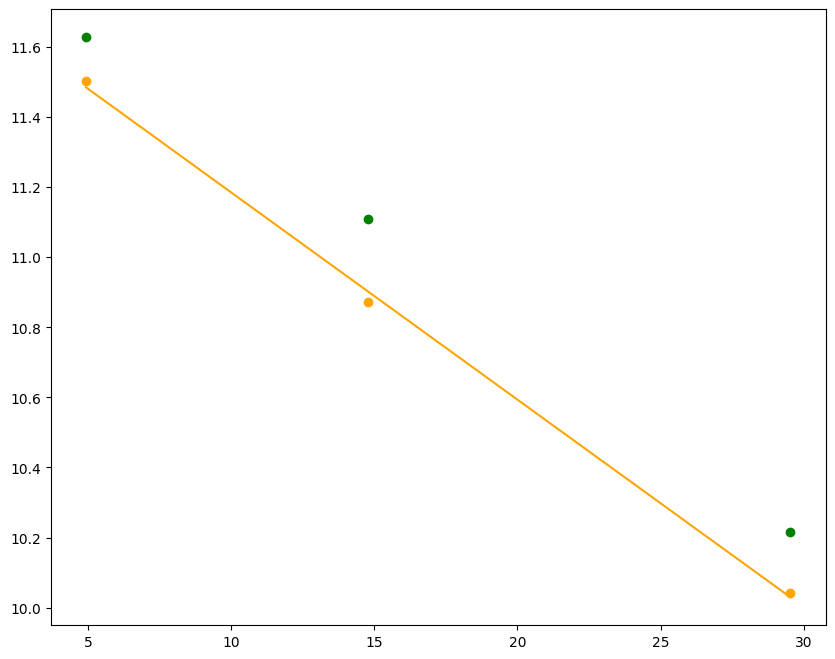

In [139]:

# Plot the rotational diagram
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(E_u_list, log_Nu_gu_list, 'o', label='', color='orange')
x_fit = np.linspace(min(E_u_list), max(E_u_list), 100)
y_fit = slope * x_fit + intercept
ax.plot(x_fit, y_fit, '-', label=f'$ \Theta_{{s}} = {theta_s:.2f}$", $T_{{rot}} = {T_rot:.1f}$ K, $N = {N_tot:.1e}$ cm$^{-2}$', color='orange')

ax.plot(E_u_list_2, log_Nu_gu_list_2, 'o', label='', color='green')
x_fit2 = np.linspace(min(E_u_list_2), max(E_u_list_2), 100)
y_fit2 = slope2 * x_fit2 + intercept2
ax.plot(x_fit2, y_fit2, '-', label=f'$ \Theta_{{s}} = {theta_s_2:.2f}$", $T_{{rot}} = {T_rot_2:.1f}$ K, $N = {N_tot_2:.1e}$ cm$^{-2}$', color='green')
#ax.text(0.05, 0.95, f'$ \theta_{{s}} = {theta_s}$ \n $T_{{rot}} = {T_rot:.1f}$ K \n $N = {N_tot:.1e}$ cm$^{-2}$',
#        transform=ax.transAxes, va='top')
ax.set_xlabel('$E_u$ (K)', fontsize=14)
ax.set_ylabel('$\log_{10} (N_u / g_u)$ [cm$^{-2}$]', fontsize=14)
ax.legend()
plt.title('Rotational Diagram for CF+ in N159W', fontsize=20)
plt.xlim()
plt.ylim()
plt.show()